# Machine Learning Model to determine the outcome of the harvest season

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#acquiring the data
agriculture_train_df=pd.read_excel("C:/Users/Subhajit Roy/Desktop/train_agriculture.xlsx")

In [8]:
#acquiring the data
agriculture_test_df=pd.read_excel("C:/Users/Subhajit Roy/Desktop/test_agriculture.xlsx")

In [7]:
agriculture_train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [10]:
#checking the structure of the dataset
agriculture_train_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [11]:
#Information about the whole dataset
agriculture_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


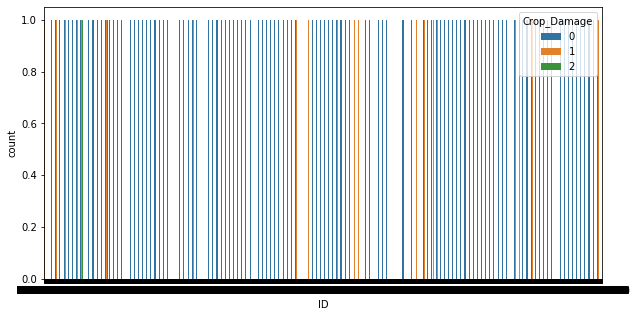

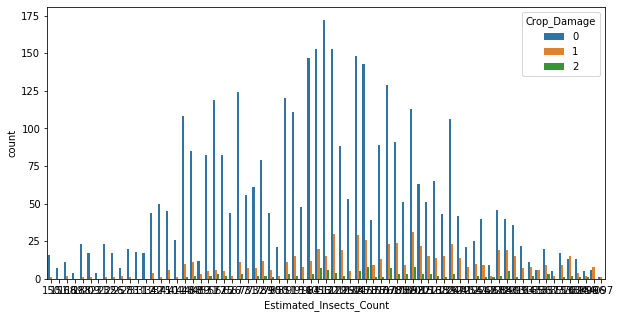

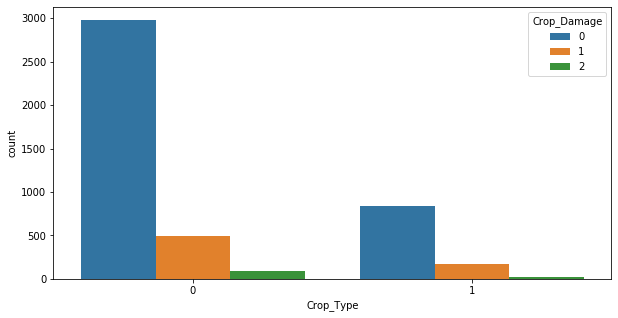

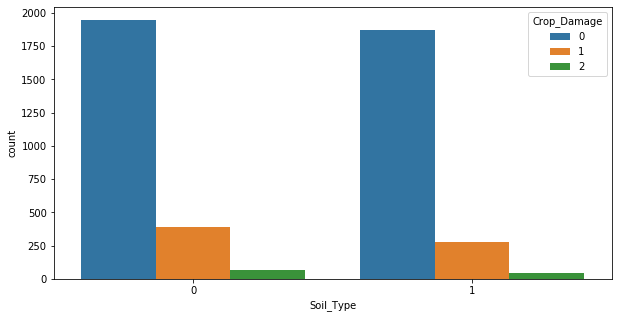

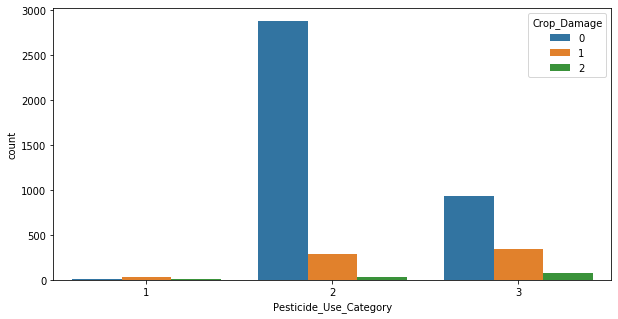

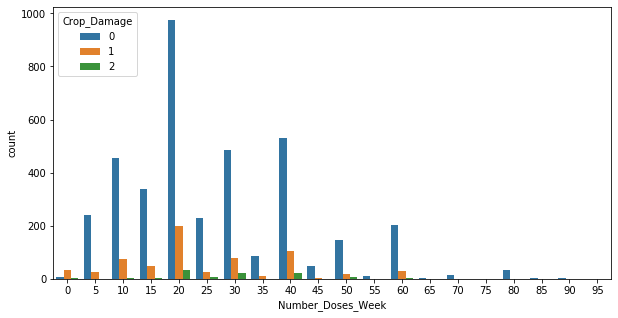

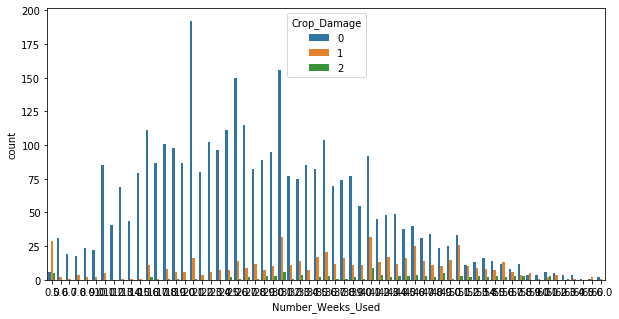

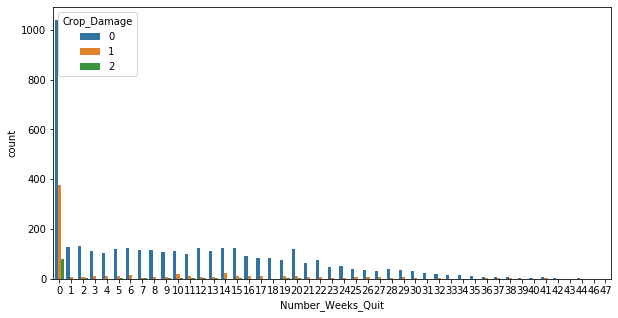

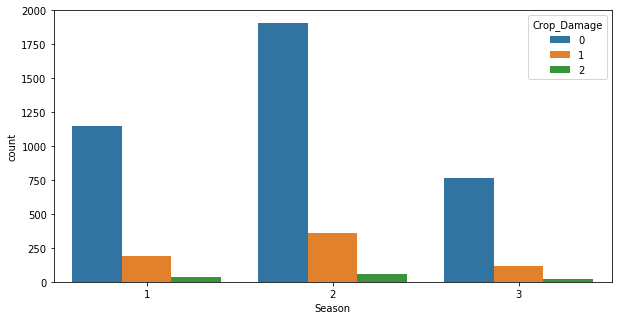

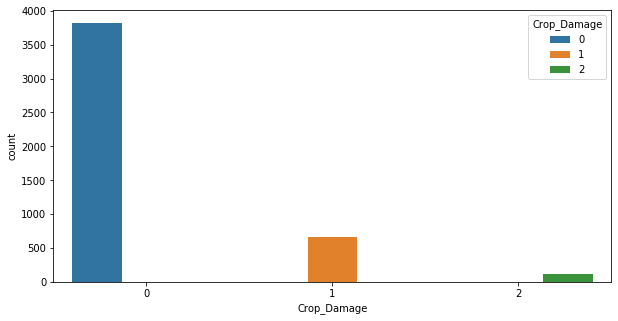

In [12]:
#printing different countplot w.r.t Crop_Damage
data_columns=agriculture_train_df.columns
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.countplot(data=agriculture_train_df,x=data_columns[i],hue='Crop_Damage')

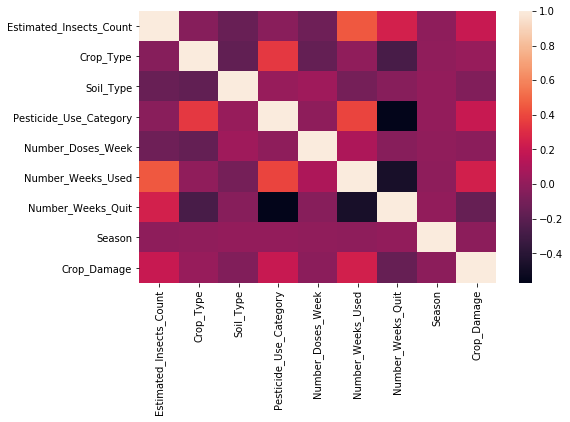

In [15]:
#checking for the correlation
corr_hmap=agriculture_train_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_hmap)

Estimated_Insects_Count       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Crop_Type                  AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Soil_Type                  AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Pesticide_Use_Category        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Number_Doses_Week          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Number_Weeks_Used          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Number_Weeks_Quit                AxesSubplot(0.125,0.125;0.227941x0.222059)
Season                        AxesSubplot(0.398529,0.125;0.227941x0.222059)
Crop_Damage                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

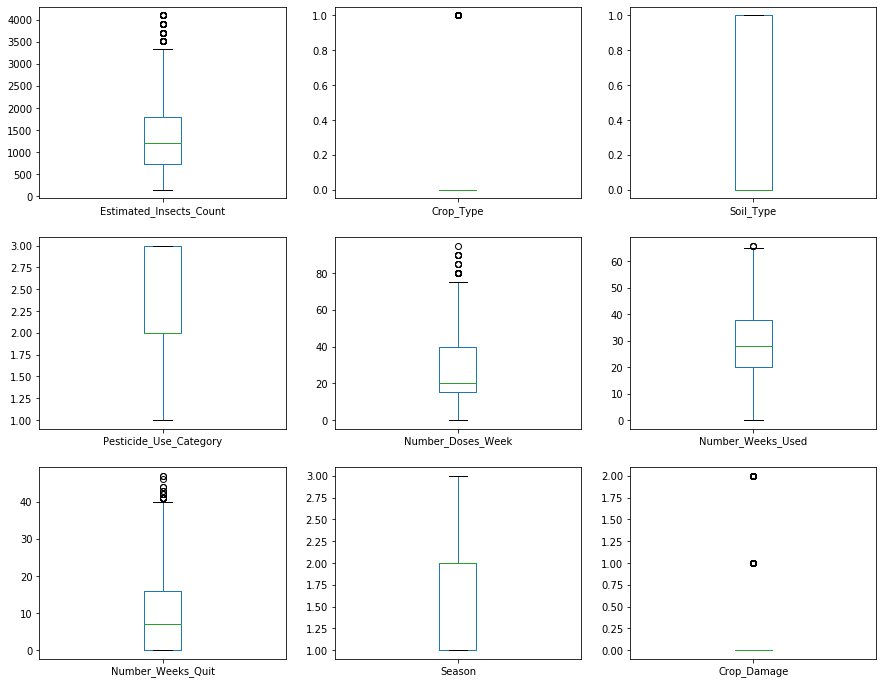

In [17]:
#checking for the outliers
agriculture_train_df.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,12))

In [19]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in agriculture_train_df.columns:
    agriculture_train_df[col] = le_x.fit_transform(agriculture_train_df[col])
agriculture_train_df.sample(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4570,4570,47,0,1,1,3,40,9,1,2
2976,2976,13,1,0,2,8,24,0,0,1
1270,1270,57,0,0,1,4,35,25,0,0
4298,4298,35,0,1,1,8,25,9,0,0
4107,4107,24,0,1,1,6,7,20,1,0


In [20]:
#removing outliers
z_score=np.abs(zscore(agriculture_train_df))
print(agriculture_train_df.shape)
agriculture_train_df_final=agriculture_train_df.loc[(z_score<3).all(axis=1)]
print(agriculture_train_df_final.shape)

(4599, 10)
(4225, 10)


In [23]:
#Now separating input and output variable
#Predicting
x=agriculture_train_df_final.drop(['Crop_Damage'],axis=1)
y=agriculture_train_df_final['Crop_Damage']
print(x.shape)
print(y.shape)

(4225, 9)
(4225,)


In [24]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.74886601, -2.29090684,  1.82209794, ..., -0.79702296,
        -0.97942329, -1.2836209 ],
       [-1.74810938, -2.21826561,  1.82209794, ..., -0.79702296,
        -0.97942329,  0.14997632],
       [-1.74735275, -1.92770066,  1.82209794, ..., -0.79702296,
        -0.97942329,  0.14997632],
       ...,
       [ 1.72860802,  1.12323122, -0.54881792, ..., -0.72646261,
         1.87652905,  0.14997632],
       [ 1.72936465,  1.12323122, -0.54881792, ..., -0.42070111,
         1.55920102,  0.14997632],
       [ 1.73012128,  1.12323122, -0.54881792, ..., -0.1149396 ,
         0.81876893,  0.14997632]])

In [25]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [29]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)        
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.8416075650118203
random state:  43  accuracy score:  0.8392434988179669
random state:  44  accuracy score:  0.8439716312056738
random state:  45  accuracy score:  0.8416075650118203
random state:  46  accuracy score:  0.8392434988179669
random state:  47  accuracy score:  0.851063829787234
random state:  48  accuracy score:  0.8699763593380615
random state:  49  accuracy score:  0.8250591016548463
random state:  50  accuracy score:  0.8486997635933806
random state:  51  accuracy score:  0.8699763593380615
random state:  52  accuracy score:  0.8321513002364066
random state:  53  accuracy score:  0.8581560283687943
random state:  54  accuracy score:  0.8486997635933806
random state:  55  accuracy score:  0.8628841607565012
random state:  56  accuracy score:  0.8557919621749409
random state:  57  accuracy score:  0.8108747044917257
random state:  58  accuracy score:  0.8486997635933806
random state:  59  accuracy score:  0.8652482269503546
random s

random state:  82  accuracy score:  0.806146572104019
random state:  83  accuracy score:  0.8321513002364066
random state:  84  accuracy score:  0.8321513002364066
random state:  85  accuracy score:  0.8250591016548463
random state:  86  accuracy score:  0.8439716312056738
random state:  87  accuracy score:  0.8156028368794326
random state:  88  accuracy score:  0.8486997635933806
random state:  89  accuracy score:  0.8723404255319149
random state:  90  accuracy score:  0.8321513002364066
random state:  91  accuracy score:  0.83451536643026
random state:  92  accuracy score:  0.8557919621749409
random state:  93  accuracy score:  0.8108747044917257
random state:  94  accuracy score:  0.806146572104019
random state:  95  accuracy score:  0.8439716312056738
random state:  96  accuracy score:  0.8747044917257684
random state:  97  accuracy score:  0.8250591016548463
random state:  98  accuracy score:  0.8605200945626478
random state:  99  accuracy score:  0.8534278959810875
random state: 

random state:  124  accuracy score:  0.7990543735224587
random state:  125  accuracy score:  0.789598108747045
random state:  126  accuracy score:  0.7848699763593381
random state:  127  accuracy score:  0.789598108747045
random state:  128  accuracy score:  0.7801418439716312
random state:  129  accuracy score:  0.8085106382978723
random state:  130  accuracy score:  0.7990543735224587
random state:  131  accuracy score:  0.8014184397163121
random state:  132  accuracy score:  0.7966903073286052
random state:  133  accuracy score:  0.8486997635933806
random state:  134  accuracy score:  0.789598108747045
random state:  135  accuracy score:  0.806146572104019
random state:  136  accuracy score:  0.8581560283687943
random state:  137  accuracy score:  0.8297872340425532
random state:  138  accuracy score:  0.8226950354609929
random state:  139  accuracy score:  0.8085106382978723
random state:  140  accuracy score:  0.789598108747045
random state:  141  accuracy score:  0.82269503546099

random state:  53  accuracy score:  0.8676122931442081
random state:  54  accuracy score:  0.8747044917257684
random state:  55  accuracy score:  0.8794326241134752
random state:  56  accuracy score:  0.8628841607565012
random state:  57  accuracy score:  0.8392434988179669
random state:  58  accuracy score:  0.8581560283687943
random state:  59  accuracy score:  0.8747044917257684
random state:  60  accuracy score:  0.8676122931442081
random state:  61  accuracy score:  0.8770685579196218
random state:  62  accuracy score:  0.8628841607565012
random state:  63  accuracy score:  0.8416075650118203
random state:  64  accuracy score:  0.8628841607565012
random state:  65  accuracy score:  0.8628841607565012
random state:  66  accuracy score:  0.8747044917257684
random state:  67  accuracy score:  0.8888888888888888
random state:  68  accuracy score:  0.8794326241134752
random state:  69  accuracy score:  0.8628841607565012
random state:  70  accuracy score:  0.8226950354609929
random sta

In [30]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.8498181063697352
Cross Validation Score(Std):  0.005085288218554187

Model name:  KNN
Cross Validation Score(Mean):  0.8400805726537104
Cross Validation Score(Std):  0.009160575189982348

Model name:  DT
Cross Validation Score(Mean):  0.7914264471955184
Cross Validation Score(Std):  0.0073030078768487015

Model name:  GNB
Cross Validation Score(Mean):  0.837189985476174
Cross Validation Score(Std):  0.0033113398426009525

Model name:  SVC
Cross Validation Score(Mean):  0.8600719275191923
Cross Validation Score(Std):  0.0031430086122342087



In [31]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression(C=1.0, class_weight=No...",87.943262,84.981811
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",87.943262,84.008057
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",86.997636,79.142645
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",88.179669,83.718999
4,"(SVC, SVC(C=1.0, break_ties=False, cache_size=...",89.125296,86.007193


In [33]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=0.10)
model_name=SVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.8912529550827423
confusion matrix: 
[[373   1]
 [ 45   4]]
classification report: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       374
           1       0.80      0.08      0.15        49

    accuracy                           0.89       423
   macro avg       0.85      0.54      0.55       423
weighted avg       0.88      0.89      0.85       423

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [34]:
#saving the model as pickle in a file
pickle.dump(model_name,open('svc_agriculture_data.pkl','wb'))

In [36]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in agriculture_test_df.columns:
    agriculture_test_df[col] = le_x.fit_transform(agriculture_test_df[col])
agriculture_test_df.sample(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
806,806,49,0,0,1,2,16,30,1
315,315,14,1,1,2,1,1,0,1
302,302,11,1,0,2,8,25,0,1
895,895,59,0,0,1,4,10,39,1
1132,1132,31,0,1,1,9,28,5,2


In [37]:
#loading the model for testing
loaded_model=pickle.load(open('svc_agriculture_data.pkl','rb'))
loaded_model.predict(agriculture_test_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)